# Linear Regression

The aim of this tutorial is to develop a model of linear regression. This is a fundamental algorithm in machine learning, and one that we will build upon later on in this course.

### Introduction

Say we have a collection of labelled examples $\{(\mathbf{x}_i, y_i)\}_{i=1}^N$, where $N$ is the size of the dataset, $\mathbf{x}_i$ is the feature vector of sample $i$ and $y_i$ is the label of sample $i$. Linear regression aims to fit a hyperplane to the data. A hyperplane is a generalisation of a plane in high dimensions. It is impossible to visualise a hyperplane, but the maths works just fine.

Based on this description, is linear regression a form of supervised learning, or unsupervised learning? Run the cell below to answer:
<span style="display:none" id="q1">W3sicXVlc3Rpb24iOiAiTGluZWFyIHJlZ3Jlc3Npb24gaXMgYSB0eXBlIG9mOiIsICJ0eXBlIjogIm11bHRpcGxlX2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlN1cGVydmlzZWQgbGVhcm5pbmcuIiwgImNvcnJlY3QiOiB0cnVlLCAiZmVlZGJhY2siOiAiVGhhdCdzIHJpZ2h0LiBCZWNhdXNlIHRoZSBleGFtcGxlcyBhcmUgbGFiZWxsZWQsIHRoaXMgaXMgc3VwZXJ2aXNlZCBsZWFybmluZy4ifSwgeyJhbnN3ZXIiOiAiVW5zdXBlcnZpc2VkIGxlYXJuaW5nIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vLiBCZWNhdXNlIHRoZSBleGFtcGxlcyBhcmUgbGFiZWxsZWQsIHRoaXMgY2Fubm90IGJlIHVuc3VwZXJ2aXNlZCBsZWFybmluZy4ifV19XQ==</span> 

In [1]:
from jupyterquiz import display_quiz
display_quiz("#q1")

<IPython.core.display.Javascript object>

Let us define the length of the feature vector, $\mathbf{x}_i$ (for all $i$) as $D$. If $D=1$, the model will aim to fit a line to the data (a line of best fit). If $D=2$, the model will aim to fit a plane to the data. For $D>2$, it'll be a hyperplane that is fit to the data. 

In general terms, the model has the following form:

$$f_{\mathbf{w},b} = \mathbf{w} \mathbf{x} + b$$

Once the model is trained (that is appropriate values of $\mathbf{w}$ and $b$ have been found), it can be used for predictions at new values of $\mathbf{x}$. 

### Engineering example

To provide a concrete engineering example, we will consider the heat transfer through a single-glazed window. A window manufacturer may be interested in training a model that can predict the rate of heat transfer, $\dot{Q}$, for a given glass thickness, $L$, window area, $A$, and a given temperature difference across the glass, $\Delta T$, (the difference between the inside and outside temperature). 

In this problem, which variables are features, and which is the label? Run the cell below to answer:

<span style="display:none" id="q2">W3sicXVlc3Rpb24iOiAiV2hpY2ggb2YgdGhlIGZvbGxvd2luZyBhcmUgZmVhdHVyZXM6IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJUaGUgdGhpY2tuZXNzIG9mIHRoZSBnbGFzcywgJEwkLiIsICJjb3JyZWN0IjogdHJ1ZX0sIHsiYW5zd2VyIjogIlRoZSB0ZW1wZXJhdHVyZSBkaWZmZXJlbmNlICRcXERlbHRhIFQkLiIsICJjb3JyZWN0IjogdHJ1ZX0sIHsiYW5zd2VyIjogIlRoZSB3aW5kb3cgYXJlYSwgJEEkLiIsICJjb3JyZWN0IjogdHJ1ZX0sIHsiYW5zd2VyIjogIlRoZSByYXRlIG9mIGhlYXQgdHJhbnNmZXIsICRcXGRvdHtRfSQuIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vLiBUaGlzIGlzIHRoZSBsYWJlbCJ9XX1d</span> 

In [2]:
from jupyterquiz import display_quiz
display_quiz("#q2")

<IPython.core.display.Javascript object>

You may notice the features are the _independent_ variables of the problem, and the label is the _dependent_ variable. Features and labels is the terminology commonly used in machine learning, but there is no appreciable difference between features and independent variables, or between labels and dependent variables. 

To keep the analysis simple, let's  consider the case where the window thickness and Area are fixed. The manufacturer is now interested in a model that can predict the rate of heat loss for a given temperature difference. Because $A$ and $L$ are fixed, this model will only work for the specific window dimension that the model is trained for. 

We have some data in the file "window_heat.csv". You can see this file in the file explorer (usually to the left). We can also load it in to this notebook by running the cell below:

In [3]:
import pandas as pd                 #Pandas is a library in Python we can use for loading csv files (amongst other things)
df = pd.read_csv('window_heat.csv') #here, we load the csv file into a Pandas dataframe object called 'df'
df                                  #this line causes the notebook to print out the dataframe so we can see its contents below:

,dT[C],Qdot[W]
0,21.178681,11401.184490
1,14.291487,7685.340740
2,4.461636,2008.096958
3,12.111569,5101.150536
4,10.510689,6033.044369
5,1.839426,856.050557
6,16.142632,9138.223754
7,11.020584,4443.590602
8,11.543094,6001.527040
9,13.215580,6724.371213


The dataframe contains a column of temperature differences and the corresponding measured rate of heat transfer through the window. 
Try answering the following:

<span style="display:none" id="q3">W3sicXVlc3Rpb24iOiAiSW4gdGhpcyBleGFtcGxlLCB3aGljaCBvZiB0aGUgZm9sbG93aW5nIGFyZSB0cnVlOiIsICJ0eXBlIjogIm1hbnlfY2hvaWNlIiwgImFuc3dlcnMiOiBbeyJhbnN3ZXIiOiAiRD0xLiIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIlRoYXQncyByaWdodC4ifSwgeyJhbnN3ZXIiOiAiRD0yLiIsICJjb3JyZWN0IjogZmFsc2UsICJmZWVkYmFjayI6ICJObywgdGhlIGxlbmd0aCBvZiB0aGUgZmVhdHVyZSB2ZWN0b3IgaXMgMSAodGhlIHRlbXBlcmF0dXJlIGRpZmZlcmVuY2UgaXMgdGhlIG9ubHkgZmVhdHVyZSkuICRcXGRvdHtRfSQgaXMgdGhlIGxhYmVsLiJ9LCB7ImFuc3dlciI6ICJOPTEiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiTm8uIFRoZSBudW1iZXIgb2YgZGF0YSBzYW1wbGVzIGlzIGdyZWF0ZXIgdGhhbiBvbmUuIn0sIHsiYW5zd2VyIjogIk49MjQiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJZdXAsIHRoZXJlIGFyZSAyNCBkYXRhIHNhbXBsZXMgb3Igb2JzZXJ2YXRpb25zLiJ9LCB7ImFuc3dlciI6ICJOPTIzIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIk5vdCBxdWl0ZSwgdGhlcmUgYXJlIDI0IGRhdGEgc2FtcGxlcyBvciBvYnNlcnZhdGlvbnMgYmVjYXVzZSB0aGUgbGlzdCBzdGFydHMgZnJvbSAwLiJ9XX1d</span> 

In [4]:
from jupyterquiz import display_quiz
display_quiz("#q3")

<IPython.core.display.Javascript object>

 We can plot the data as follows:

<Axes: xlabel='dT[C]', ylabel='Qdot[W]'>

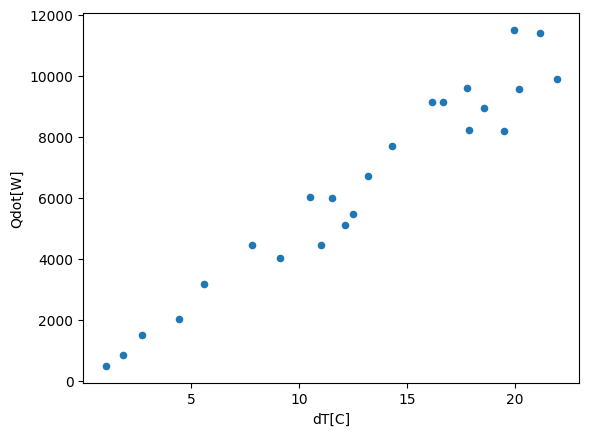

In [5]:
import matplotlib.pyplot as plt         #matplotlib is a plotting library in Python
df.plot.scatter(x='dT[C]', y='Qdot[W]')       #We plot the dataframe as a scatter plot to visualise the output

As expected, the rate of heat loss in Watts is higher if the temperature difference between the inside and outside is greater. We can visually see the relationship is broadly a linear one. Our aim here is to fit a line to this data through linear regression.

First, we can get the raw data in numpy arrays to allow simple manipulation later on:

In [6]:
dT   = df['dT[C]'].to_numpy()
Qdot = df['Qdot[W]'].to_numpy()

print("Temperature Numpy array: \n", dT)
print("Rate of heat loss Numpy array: \n", Qdot)

Temperature Numpy array: 
 [21.17868122 14.29148669  4.46163576 12.11156896 10.51068853  1.83942596
 16.14263216 11.02058403 11.54309387 13.21557996 18.58510411 17.861556
  1.05453528  9.14420922 12.50187809 17.76101113 16.66914553 19.9557194
  5.6085215   7.82093256 19.49508479 20.19636593 21.93011502  2.72067367]
Rate of heat loss Numpy array: 
 [11401.18449    7685.34074    2008.096958   5101.150536   6033.044369
   856.0505567  9138.223754   4443.590602   6001.52704    6724.371213
  8950.102746   8210.753416    482.653133   4017.065937   5475.235098
  9598.267822   9157.500008  11507.78876    3167.120891   4456.856096
  8189.344738   9574.5468     9880.9984     1498.245219 ]


#### Loss Function

In linear regression, we are trying to find the values of $w$ and $b$ that fit the data as best we can. To this end, we need a way of assessing how far the current values are.

Our model (for D=1) has the form $f=wx+b$. We do not know what the optimal values for $w$ or $b$. For each data point, we can measure the mean of the square of the difference between the model's prediction $wx+b$ and the label:

$$\frac{1}{N} \sum_{i=1}^N(y_i - (wx_i+b))^2$$

If this is small, then the model is working well; conversely, if this is large, the model's prediction will be far from the labelled values at the known data points. We call this a loss function. We want to make the loss function as small as we can.

Let's denote the loss function as $l$:

$$l \equiv \frac{1}{N} \sum_{i=1}^N(y_i - (wx_i+b))^2$$

#### Gradient decent
We are interested in finding the values of $w$ and $b$ that minimise $l$. We can find the partial derivatives of the loss function with respect to the parameters $w$ and $b$. This will tell us how we might expect $l$ to change with a change in $w$ or $b$.

$$\frac{\partial l}{\partial w} = \frac{1}{N} \sum_{i=1}^N -2x_i(y_i - (wx_i+b))$$,
$$\frac{\partial l}{\partial b} = \frac{1}{N} \sum_{i=1}^N -2(y_i - (wx_i+b))$$.

With these partial derivatives, we can update $w$ and $b$ to drive down the loss: 

$$w \leftarrow w - \alpha \frac{\partial l}{\partial w}$$
$$b \leftarrow b - \alpha \frac{\partial l}{\partial b}$$

where $\alpha$ is the learning rate, and controls how quick the update is applied. Our updates for $w$ and $b$ can be implemented as follows:

In [7]:
def update_wb( x, y, w, b, alpha ):
    """
    Updates w and b in an attempt to reduce loss.

    x: feature (in this case, x=dT, the temperature difference). 
    y: label (in this case, Qdot).
    w: The current value of w before its update. 
    b: The current value of b before its update.
    alpha: the learning rate.|
    """
    dl_dw = 0.0                                #initialse to zero
    dl_db = 0.0                                #initialse to zero

    #find the partial derivatives:
    for i in range(len(x)):                   #loop from i=0 to 23.
        dl_dw += -2.0*x[i]*(y[i]-(w*x[i]+b))
        dl_db += -2.0*(y[i]-(w*x[i]+b))

    dl_dw = dl_dw/float(len(x))
    dl_db = dl_db/float(len(x))

    w = w - alpha*dl_dw
    b = b - alpha*dl_db

    return w, b

We also need a way of evaluating the loss function, $l$, for a given value of $w$ and $b$, as per the following function:

In [8]:
def loss(x, y, w, b):
    l=0.0
    
    for i in range(len(x)):
        l += (y[i] - (w*x[i]+b))**2

    l = l/float(len(x))

    return l

With the two functions above defined, we can start to train our model. We can start with a guess of $w=0$ and $b=0$. These are the parameters of our model. We also need to choose a value of $\alpha$. For now, let's go for $\alpha=0.0001$ (more on this later). We will keep count of how many times we have updated $w$ and $b$ using the `epoch` integer.

<a id='training_cell'></a>

In [9]:
w=0.0
b=0.0
alpha=0.0001

epoch = 1

w, b = update_wb(dT, Qdot, w, b, alpha)
print("Epoch: ", epoch, "w: ", w, "b: ", b, "loss: ", loss(dT, Qdot, w, b))
        

Epoch:  1 w:  20.329343396551536 b:  1.279658827689167 loss:  47248960.614890605


OK, let's look at the results:

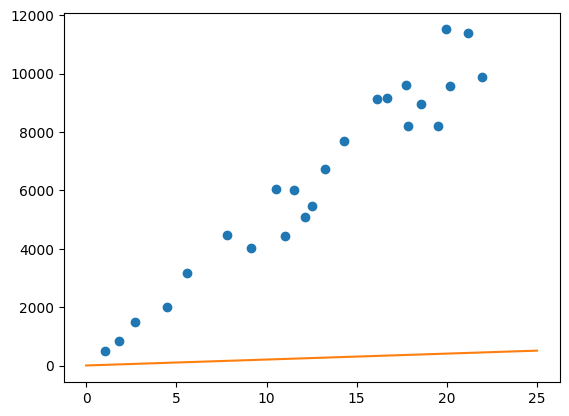

In [10]:
plt.plot(dT, Qdot, marker = 'o', ls='')
plt.plot([0,25],[b,w*25+b])

Pretty terrible! We should try more epochs:

Epoch:  2 w:  39.82714023870224 b:  2.5069474129597538 loss:  43510316.33929932
Epoch:  3 w:  58.52740397616789 b:  3.6840079010418068 loss:  40071266.684091516
Epoch:  4 w:  76.46275677785417 b:  4.812894815192968 loss:  36907803.76564584
Epoch:  5 w:  93.66448644058863 b:  5.895578640773889 loss:  33997843.56157469
Epoch:  6 w:  110.16260097006685 b:  6.933949262721177 loss:  31321071.742947187


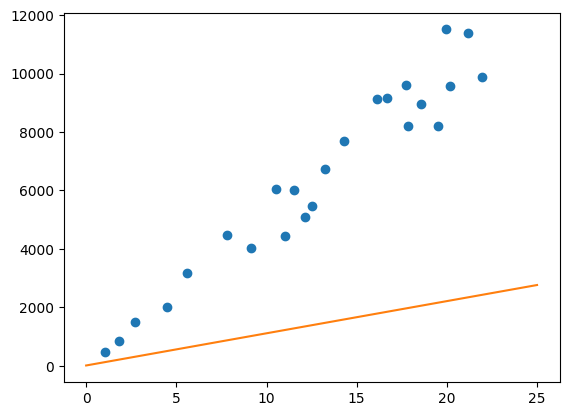

In [11]:
for i in range(5): #lets try 5 more
    epoch += 1

    w, b = update_wb(dT, Qdot, w, b, alpha)
    print("Epoch: ", epoch, "w: ", w, "b: ", b, "loss: ", loss(dT, Qdot, w, b))

plt.plot(dT, Qdot, marker = 'o', ls='')
plt.plot([0,25],[b,w*25+b])

Better, but still a way to go!

Epoch:  7 w:  125.98588092922799 b:  7.9298192624145 loss:  28858801.860679533
Epoch:  8 w:  141.16192964538078 b:  8.884927079689144 loss:  26593844.89609684
Epoch:  9 w:  155.717221363665 b:  9.800940045510114 loss:  24510389.265003424
Epoch:  10 w:  169.67714743085136 b:  10.679457290598204 loss:  22593890.437574502
Epoch:  11 w:  183.06606059004642 b:  11.52201253508209 loss:  20830969.403509296
Epoch:  12 w:  195.90731746357392 b:  12.33007676404292 loss:  19209319.27363481
Epoch:  13 w:  208.22331929814308 b:  13.105060793618852 loss:  17717619.36594898
Epoch:  14 w:  220.03555104338267 b:  13.84831773214607 loss:  16345456.176341258
Epoch:  15 w:  231.3646188319131 b:  14.561145340629647 loss:  15083250.682289757
Epoch:  16 w:  242.23028592633943 b:  15.244788296662097 loss:  13922191.47204484
Epoch:  17 w:  252.6515071958742 b:  15.900440365738959 loss:  12854173.232476236
Epoch:  18 w:  262.6464621827339 b:  16.529246483759213 loss:  11871740.166169597
Epoch:  19 w:  272.23258

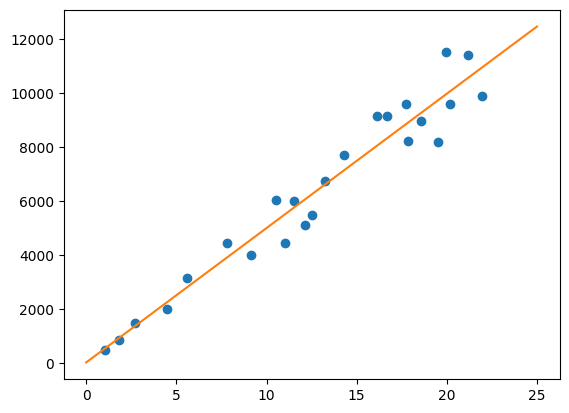

In [12]:
for i in range(200):  #let's try 200 more
    epoch += 1
    w, b = update_wb(dT, Qdot, w, b, alpha)
    print("Epoch: ", epoch, "w: ", w, "b: ", b, "loss: ", loss(dT, Qdot, w, b))

plt.plot(dT, Qdot, marker = 'o', ls='')
plt.plot([0,25],[b,w*25+b])
        

Looks good. 

## Things to try

- What happens if you go back and train with $\alpha=0.1$ or $1\times 10^{-5}$? Click [here](#training_cell) to return to the start of training. Change $\alpha$ and re-run the training cells to experiment.
- Train a linear regression model with the following data:
  
  x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  
  y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 100]

  Would this be a good predictor? What are the limitations of linear regression models?

## Linear regression with Scikit learn or Matlab

It is important to note that the above is a pedagogical example. In practical applications, you would not be well advised to implement your own linear regression. For one, this is reinventing the wheel. But perhaps even more importantly, the computational performance of our simple model is unlikely to be very good (i.e. it may take a long time to run on large datasets). In matlab, you can use the `fitlm` function to return a linear regression model. 

## Physics based vs. data-driven models.

It so happens this problem can be well approximated through Fourier's law:

$$\dot{Q} = \frac{k  A \Delta T}{L}$$

